In [6]:
import os
os.chdir('/home/hugo-dev/esirem-dev/4a/kmutt/kmutt_v2')

In [7]:
import numpy as np
from scipy.stats import f_oneway
from utils.load_data import load_data_with_mapping

In [8]:
DATA_PATH = "./data/data_25ms_h=50%_16mfcc.json"

In [9]:
def calculate_f_ratios(mfcc_data, labels):
    f_ratios = []
    n_mfcc = mfcc_data.shape[2]  # 16 MFCCs
    
    for i in range(n_mfcc):
        # Extraire les valeurs du coefficient MFCC i pour chaque classe
        class_data = [mfcc_data[labels == label, 0, i] for label in np.unique(labels)]
        
        # Calculer le F-ratio en utilisant une ANOVA à un facteur
        f_val, p_val = f_oneway(*class_data)
        f_ratios.append(f_val)
    
    return f_ratios

In [10]:
X, y, mapping = load_data_with_mapping(DATA_PATH)

print(X.shape)
print(y.shape)

Training sets loaded!
(560121, 1, 16)
(560121,)


In [11]:
f_ratios = calculate_f_ratios(X, y)
print(f_ratios)

[109786.0794115388, 23509.957575247714, 15688.644365886094, 1738.925841352303, 18167.992054788774, 2016.3973427450567, 1750.7358330950692, 2464.855307228634, 3037.932020059809, 12904.012382135554, 4471.317416288391, 7940.213036093581, 3773.516260948548, 14544.674019481994, 4415.096775958968, 2301.7101858114956]


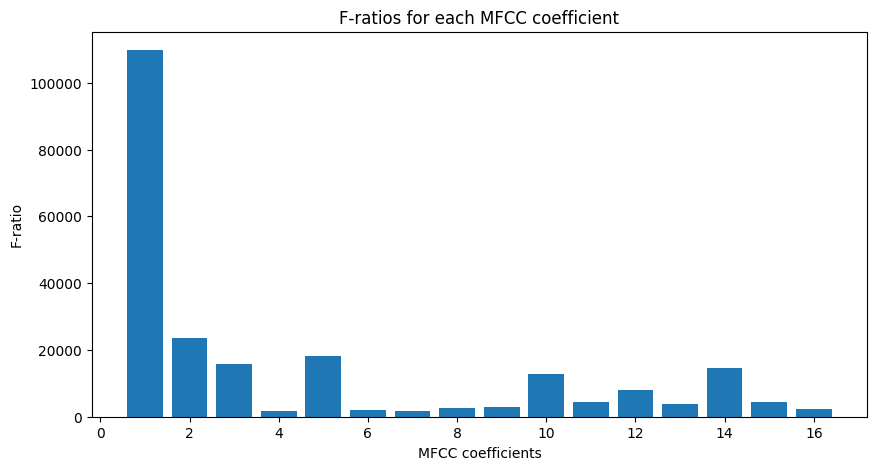

In [12]:
# draw the F-ratios
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(1, 17), f_ratios)
plt.xlabel("MFCC coefficients")
plt.ylabel("F-ratio")
plt.title("F-ratios for each MFCC coefficient")
plt.show()